**General Rules \& Submission Guidelines**

* Your work should be original and must be completed individually.
* The use of external sources must be properly cited.
* All coding must be done individually, and plagiarism will not be tolerated.
* Late submissions will incur a penalty unless an extension is granted by the instructor.
* Use this template notebook for your answers.
* Your assignment should be submitted as one and only one notebook file (.ipynb). Do not change the name of the file but do not forget to fill your name in the notebook.

# Assignment 1

Please enter your **name, surname** and **student number** instead of `"NAME-HERE"`, `"SURNAME-HERE"`, `"NUMBER-HERE"` below.

In [5]:
student = {
    'name' : "FATMA" ,
    'surname' : "DONER",
    'studentNumber' : "2282986"
}

print(student)

{'name': 'FATMA', 'surname': 'DONER', 'studentNumber': '2282986'}


## Part I: Classification Problem
1. The "Rain in Australia" should be downloaded from the Kaggle website https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package.
2. Use a seed value of 12345 for random number generators to ensure reproducibility in your experiments. [Mandatory, 0 points]
3. Conduct Exploratory Data Analysis (EDA) to gain insights into the dataset
characteristics. Employ statistical summaries and visualizations to uncover patterns and anomalies. [10 points]
4. Execute data preprocessing to enhance model performance if deemed necessary. This may include handling missing values, encoding categorical
variables, feature scaling, and any other technique that could improve the
results. [5 points]
5. Implement 5-Fold Cross Validation to assess the robustness of your models.
This approach ensures that the evaluation of your model is as accurate as
possible. [5 points]
6. Develop and evaluate models using K-Nearest Neighbors (KNN), Perceptron, and Logistic Regression algorithms. Document the
performance of each model. [30 points]
7. Investigate the outcomes using appropriate metrics such as accuracy, precision, recall, F1 score, and ROC-AUC curve where applicable. [5 points]
8. Discuss the results. Reflect on which model yielded the best performance
and hypothesize why this might be the case. Consider the algorithm’s suitability for the data distribution, complexity, and balance of the dataset.
[15 points]


In [6]:
# Your code here (you can add more blocks as you need).
# Please add comments where you think necessary.

In [7]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.preprocessing import StandardScaler

In [8]:
# Load the dataset
data = pd.read_csv("weatherAUS.csv")
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [9]:
# 2. Use a seed value of 12345 for random number generators to ensure reproducibility in your experiments. [Mandatory, 0 points]
np.random.seed(12345)

<Axes: xlabel='RainTomorrow', ylabel='count'>

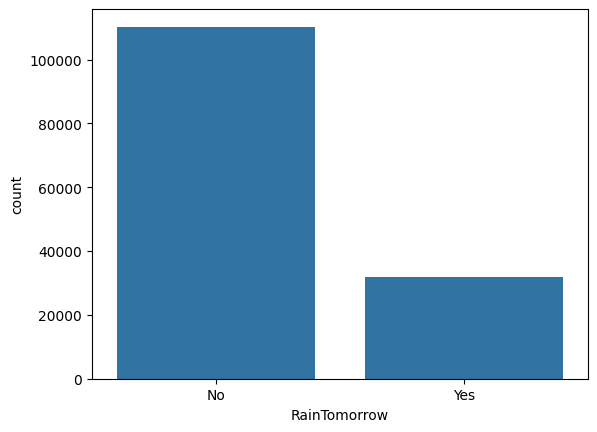

In [10]:
# 3. Conduct Exploratory Data Analysis (EDA) to gain insights into the dataset characteristics. Employ statistical summaries and visualizations to uncover patterns and anomalies. [10 points]
import seaborn as sns
sns.countplot(x=data['RainTomorrow'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [12]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [13]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [14]:
data.shape

(145460, 23)

In [15]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [17]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [18]:
# 4. Execute data preprocessing to enhance model performance if deemed necessary. This may include handling missing values, encoding categorical variables, feature scaling, and any other technique that could improve the results. [5 points]

from sklearn.preprocessing import LabelEncoder
category=data.dtypes=="object"
category
category_list=list(category[category].index)
category_list
for i in category_list:
  data[i].fillna(data[i].mode(),inplace=True)
LB=LabelEncoder()
for i in category_list:
  data[i]=LB.fit_transform(data[i])

In [19]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,397,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,398,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,399,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,400,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,3431,41,2.8,23.4,0.0,NaN,NaN,0,31.0,9,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0
145456,3432,41,3.6,25.3,0.0,NaN,NaN,6,22.0,9,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0
145457,3433,41,5.4,26.9,0.0,NaN,NaN,3,37.0,9,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0
145458,3434,41,7.8,27.0,0.0,NaN,NaN,9,28.0,10,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [20]:
# Drop the columns that are not needed for the analysis
data = data.drop(['Date','Evaporation','Sunshine','Cloud9am',"Cloud3pm"], axis=1)

In [21]:
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].fillna(data[column].mode()[0])
    else:
        data[column] = data[column].fillna(data[column].mean())

In [22]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [23]:
# 5. Implement 5-Fold Cross Validation to assess the robustness of your models. This approach ensures that the evaluation of your model is as accurate as possible. [5 points]

# Split the dataset into features and target variable

X=data.drop(['RainTomorrow'],axis=1)
y=data['RainTomorrow']

In [24]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [25]:
# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn_scores = cross_val_score(knn, X_train, y_train, cv=5)
print("K-Nearest Neighbors (KNN) Scores:", knn_scores)

K-Nearest Neighbors (KNN) Scores: [0.82181834 0.82113088 0.82177537 0.81944743 0.81953336]


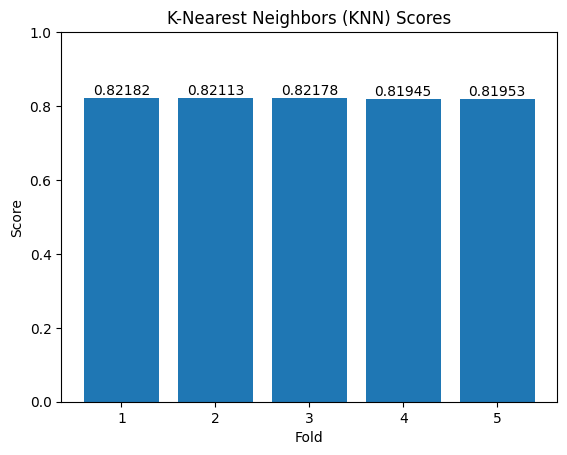

In [26]:
# Plot the scores of the K-Nearest Neighbors (KNN) model as a bar chart with maximum score of 1, put values on the bars, and add labels to the axes
plt.bar(range(1, 6), knn_scores)
plt.ylim(0, 1)
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('K-Nearest Neighbors (KNN) Scores')

# Put values on the bars
for i in range(1, 6):
    plt.text(i, knn_scores[i-1], str(round(knn_scores[i-1], 5)), ha='center', va='bottom')

plt.show()

In [27]:
# Perceptron
perceptron = Perceptron()
perceptron_scores = cross_val_score(perceptron, X_train, y_train, cv=5)
print("Perceptron Scores:", perceptron_scores)

Perceptron Scores: [0.81928332 0.76518862 0.79943284 0.81845916 0.81631075]


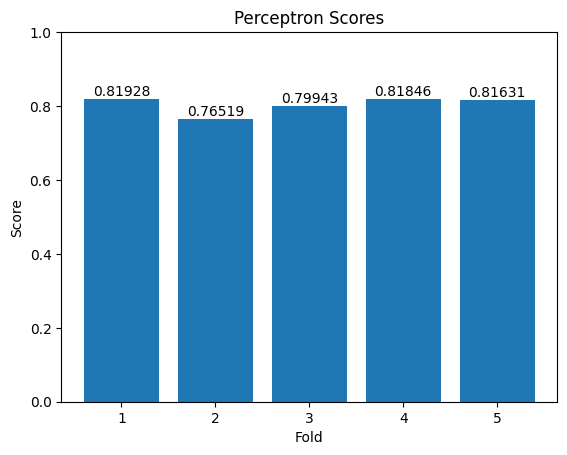

In [28]:
# Plot the scores of the Perceptron model as a bar chart with maximum score of 1, put values on the bars, and add labels to the axes
plt.bar(range(1, 6), perceptron_scores)
plt.ylim(0, 1)
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Perceptron Scores')

# Put values on the bars
for i in range(1, 6):
    plt.text(i, perceptron_scores[i-1], str(round(perceptron_scores[i-1], 5)), ha='center', va='bottom')

plt.show()

In [29]:
# Scaling data for Logistic Regression
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression_scores = cross_val_score(logistic_regression, X_train, y_train, cv=5)
print("Logistic Regression Scores:", logistic_regression_scores)

Logistic Regression Scores: [0.83011085 0.82706024 0.82744694 0.82666609 0.82645125]


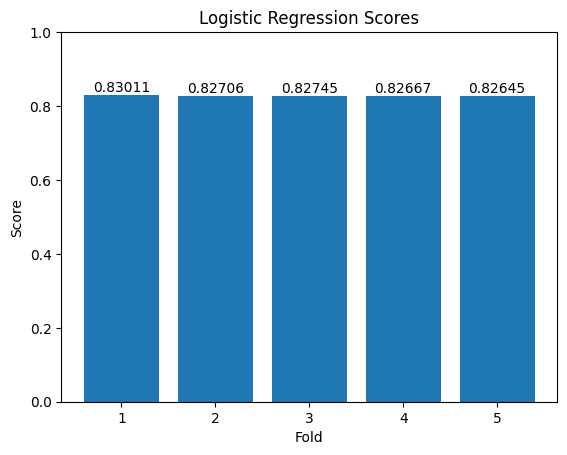

In [31]:
# Plot the scores of the Logistic Regression model as a bar chart with maximum score of 1, put values on the bars, and add labels to the axes
plt.bar(range(1, 6), logistic_regression_scores)
plt.ylim(0, 1)
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Logistic Regression Scores')

# Put values on the bars
for i in range(1, 6):
    plt.text(i, logistic_regression_scores[i-1], str(round(logistic_regression_scores[i-1], 5)), ha='center', va='bottom')

plt.show()

In [32]:
# 7. Investigate the outcomes using appropriate metrics such as accuracy, precision, recall, F1 score, and ROC-AUC curve where applicable. [5 points]

# K-Nearest Neighbors (KNN)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("K-Nearest Neighbors (KNN) Accuracy:", accuracy_score(y_test, knn_pred))
print("K-Nearest Neighbors (KNN) Precision:", precision_score(y_test, knn_pred,average='weighted'))
print("K-Nearest Neighbors (KNN) Recall:", recall_score(y_test, knn_pred,average='weighted'))
print("K-Nearest Neighbors (KNN) F1 Score:", f1_score(y_test, knn_pred,average='weighted'))
print("K-Nearest Neighbors (KNN) ROC-AUC Score:", roc_auc_score(y_test, knn.predict_proba(X_test),multi_class='ovo'))


K-Nearest Neighbors (KNN) Accuracy: 0.81706311013337
K-Nearest Neighbors (KNN) Precision: 0.803510771061243
K-Nearest Neighbors (KNN) Recall: 0.81706311013337
K-Nearest Neighbors (KNN) F1 Score: 0.804759846960199
K-Nearest Neighbors (KNN) ROC-AUC Score: 0.8035477474313183


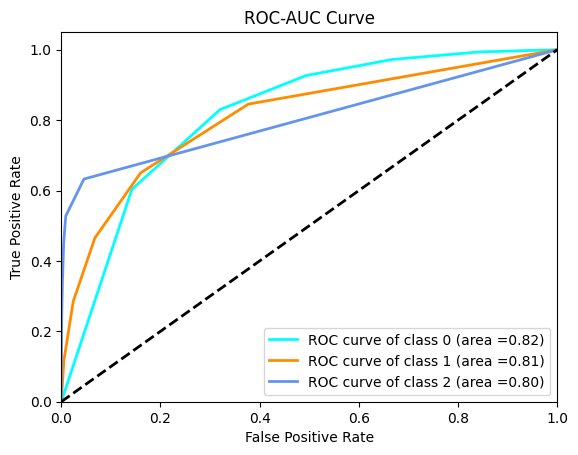

In [37]:
from sklearn.preprocessing import label_binarize
y_test = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], knn.predict_proba(X_test)[:, i])
    roc_auc[i] = roc_auc_score(y_test[:, i], knn.predict_proba(X_test)[:, i])

plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area ={1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc="lower right")
plt.show()

In [41]:
# Perceptron
perceptron.fit(X_train, y_train)
perceptron_pred = perceptron.predict(X_test)
# Binarize the output
perceptron_pred = label_binarize(perceptron_pred, classes=[0, 1, 2])

print("Perceptron Accuracy:", accuracy_score(y_test, perceptron_pred))
print("Perceptron Precision:", precision_score(y_test, perceptron_pred,average='weighted'))
print("Perceptron Recall:", recall_score(y_test, perceptron_pred,average='weighted'))
print("Perceptron F1 Score:", f1_score(y_test, perceptron_pred,average='weighted'))
print("Perceptron ROC-AUC Score:", roc_auc_score(y_test, perceptron_pred))

Perceptron Accuracy: 0.8014918190567853
Perceptron Precision: 0.7733086733970622
Perceptron Recall: 0.8014918190567853
Perceptron F1 Score: 0.7850973243926825
Perceptron ROC-AUC Score: 0.6333586603651065


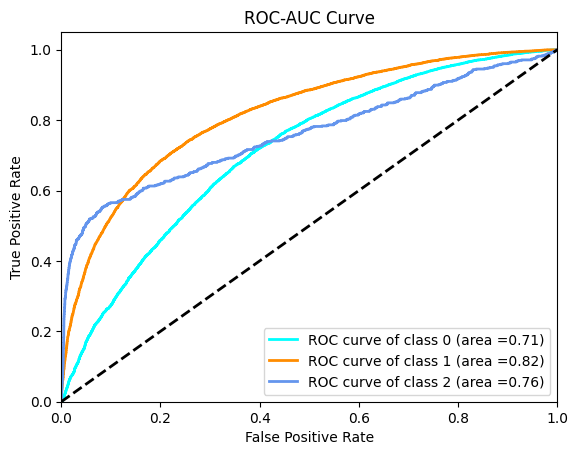

In [48]:
# Plot the ROC-AUC curve of the Perceptron model
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], perceptron.decision_function(X_test)[:, i])
    roc_auc[i] = roc_auc_score(y_test[:, i], perceptron.decision_function(X_test)[:, i])

plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area ={1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc="lower right")
plt.show()

In [51]:
# Logistic Regression
logistic_regression.fit(X_train, y_train)
logistic_regression_pred = logistic_regression.predict(X_test)
# Binarize the output
logistic_regression_pred = label_binarize(logistic_regression_pred, classes=[0, 1, 2])
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_regression_pred))
print("Logistic Regression Precision:", precision_score(y_test, logistic_regression_pred,average='weighted'))
print("Logistic Regression Recall:", recall_score(y_test, logistic_regression_pred,average='weighted'))
print("Logistic Regression F1 Score:", f1_score(y_test, logistic_regression_pred,average='weighted'))
print("Logistic Regression ROC-AUC Score:", roc_auc_score(y_test, logistic_regression.predict_proba(X_test),multi_class='ovo'))

Logistic Regression Accuracy: 0.8235597415096934
Logistic Regression Precision: 0.8106492113571377
Logistic Regression Recall: 0.8235597415096934
Logistic Regression F1 Score: 0.8093874313683813
Logistic Regression ROC-AUC Score: 0.8472891309960021


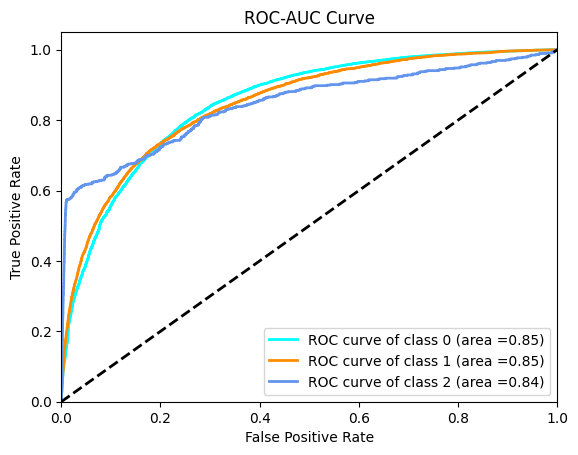

In [52]:
# Plot the ROC-AUC curve of the Logistic Regression model
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], logistic_regression.predict_proba(X_test)[:, i])
    roc_auc[i] = roc_auc_score(y_test[:, i], logistic_regression.predict_proba(X_test)[:, i])

plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area ={1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc="lower right")
plt.show()

## Part II: Gradient Descent Implementation
1. The "House Rent Prediction Dataset" should be downloaded from the Kaggle website https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset
2. Implement the gradient descent algorithm without using of any libraries
except for Pandas and NumPy. [10 points]
3. How many iteration step needs to converge with learning rate [0.01, 0.1,
1]? Devise an intelligent strategy for choosing the learning rate to reduce
the number of iterations required for convergence. Show how the learning
rate that you propose impacts the convergence of the gradient descent
algorithm. Show on the graph how the cost function changes with the
number of iterations and how the gradient descent converges. [20 points]


In [53]:
df = pd.read_csv("House_Rent_Dataset.csv")
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [54]:
df.shape

(4746, 12)

In [55]:
# Drop the columns that are not needed for the analysis
df = df.drop(['Posted On', 'Point of Contact'], axis=1)

# Drop the rows that have missing values
df = df.dropna()

# Encode the categorical variables
df = pd.get_dummies(df)

In [56]:
df.head()

,BHK,Rent,Size,Bathroom,Floor_1,Floor_1 out of 1,Floor_1 out of 10,Floor_1 out of 11,Floor_1 out of 12,Floor_1 out of 13,...,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family
0,2,10000,1100,2,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,True,False
1,2,20000,800,1,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False
2,2,17000,1000,1,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False
3,2,10000,800,1,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,True,False
4,2,7500,850,1,False,False,False,False,False,False,...,False,False,True,False,False,False,True,True,False,False


In [57]:
# Normalizing the data
df = (df - df.mean()) / df.std()

In [58]:
# Define the gradient descent function
def gradient_descent(X, y, theta, alpha):
    m = len(y)
    J_history = np.zeros(10000)

    i = 0
    while True:
        h = X.dot(theta)
        theta = theta - alpha * (1/m) * (X.T.dot(h-y))
        J_history[i] = np.sum((X.dot(theta)-y)**2) / (2*m)

        # Early stopping if the cost is not decreasing
        if i > 0 and J_history[i] >= J_history[i-1]:
            break

        # Add positive momentum to the learning rate if the cost is decreasing slowly
        if i > 0 and J_history[i-1] - J_history[i] < 0.0001:
            alpha = alpha * 1.005

        # Add negative momentum to the learning rate if the cost is decreasing quickly
        if i > 0 and J_history[i-1] - J_history[i] > 0.01:
            alpha = alpha * 0.89

        i += 1

    # Crop the J_history array to the number of iterations
    J_history = J_history[:i]

    # Return the parameters of the model, the cost function values, and the number of iterations
    return theta, J_history, i+1

In [59]:
# Add a column of ones to the dataset for the intercept term
df.insert(0, 'Ones', 1)

# Split the dataset into features and target variable
X = df.drop('Rent', axis=1)
y = df['Rent']

# Convert the features and target variable to NumPy arrays
X = np.array(X)
y = np.array(y).reshape(-1, 1)

In [60]:
X

array([[ 1.        , -0.10076239,  0.20893848, ..., -0.46033283,
         0.61479194, -0.33228289],
       [ 1.        , -0.10076239, -0.26409668, ..., -0.46033283,
         0.61479194, -0.33228289],
       [ 1.        , -0.10076239,  0.05126009, ..., -0.46033283,
         0.61479194, -0.33228289],
       ...,
       [ 1.        ,  1.10079113,  1.233848  , ..., -0.46033283,
         0.61479194, -0.33228289],
       [ 1.        ,  1.10079113,  0.83965203, ..., -0.46033283,
        -1.62622383,  3.00884975],
       [ 1.        , -0.10076239,  0.05126009, ...,  2.17188355,
        -1.62622383, -0.33228289]])

In [61]:
y

array([[-3.19992308e-01],
       [-1.91961847e-01],
       [-2.30370986e-01],
       ...,
       [ 8.38429563e-05],
       [ 1.28114303e-01],
       [-2.55977078e-01]])

Theta for alpha = 0.01 : [[-1.38693940e-16]
 [-2.89336996e-02]
 [ 2.97816569e-01]
 ...
 [ 1.91714868e-02]
 [-7.93191691e-03]
 [-1.25091052e-02]]
Number of iterations for alpha = 0.01 : 1140
Final Cost Function for alpha = 0.01 : 0.17749742137018298


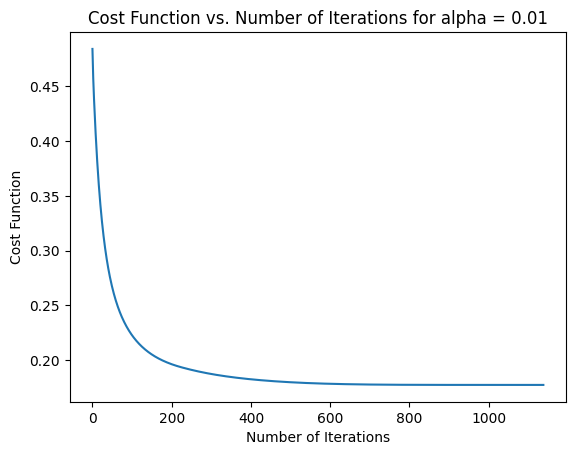

Theta for alpha = 0.1 : [[-8.19111486e-17]
 [-2.90619910e-02]
 [ 2.97805580e-01]
 ...
 [ 1.90959775e-02]
 [-7.84548006e-03]
 [-1.25421283e-02]]
Number of iterations for alpha = 0.1 : 383
Final Cost Function for alpha = 0.1 : 0.1774905375304086


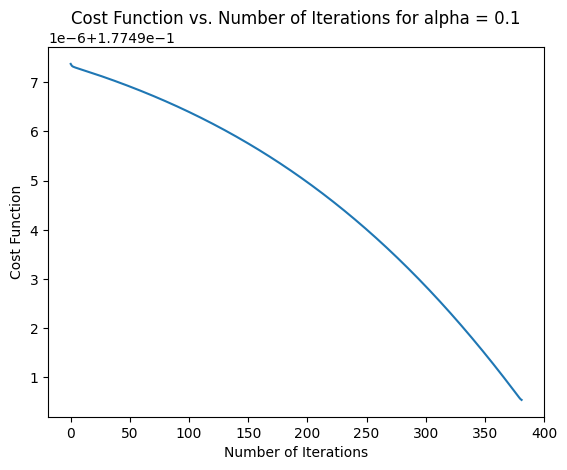

Theta for alpha = 1 : [[-9.99236166e-17]
 [-2.95792966e-02]
 [ 2.97353304e-01]
 ...
 [ 1.88397342e-02]
 [-7.41097011e-03]
 [-1.28646841e-02]]
Number of iterations for alpha = 1 : 2
Final Cost Function for alpha = 1 : 0.17749126134299026


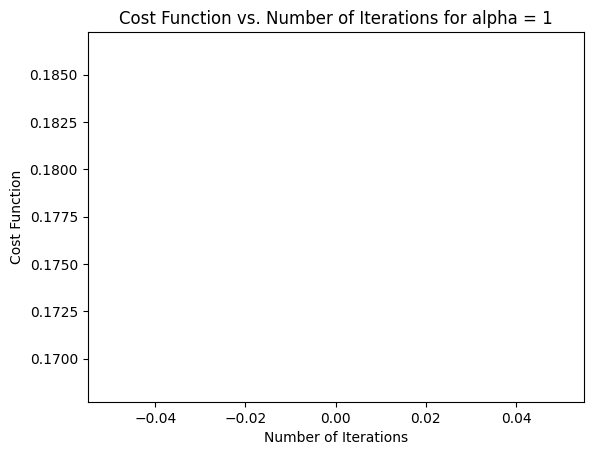

In [62]:
# Initialize the parameters of the model
theta = np.zeros((X.shape[1], 1))

# Set the learning rates
alphas = [0.01, 0.1, 1]

#3. How many iteration step needs to converge with learning rate [0.01, 0.1, 1]? Devise an intelligent strategy for choosing the learning rate to reduce the number of iterations required for convergence. Show how the learning rate that you propose impacts the convergence of the gradient descent algorithm. Show on the graph how the cost function changes with the number of iterations and how the gradient descent converges. [20 points]

# Run the gradient descent algorithm for different learning rates
for alpha in alphas:
    theta, J_history, required_num_of_iteration = gradient_descent(X, y, theta, alpha)
    print("Theta for alpha =", alpha, ":", theta)
    print("Number of iterations for alpha =", alpha, ":", required_num_of_iteration)
    print("Final Cost Function for alpha =", alpha, ":", J_history[-1])

    # Plot the cost function with the number of iterations
    plt.plot(range(required_num_of_iteration-1), J_history)
    plt.xlabel('Number of Iterations')
    plt.ylabel('Cost Function')
    plt.title('Cost Function vs. Number of Iterations for alpha = ' + str(alpha))
    plt.show()

*Your Discussion Here*
(You can double click and edit this block)